# Entendimiento inicial de datos

En este notebook se hace un entendimiento inicial de los datos para evaluar su tipo y comportamiento a grandes rasgos. Esto para el dataset de propiedades de AirBNB de Chicago.

## Librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Para poder visualizar todas las columnas de estadísticos
pd.set_option('display.max_columns', 100)

## Constantes

### Archivo de listings

In [3]:
LISTINGS_FILE = "/content/drive/MyDrive/UNIANDES/2023-II/CIENCIA DE DATOS APLICADA/taller_1/data/listings.csv"

### Archivo para guardar listings limpios

In [4]:
SAVING_LISTINGS_FILE = "/content/drive/MyDrive/UNIANDES/2023-II/CIENCIA DE DATOS APLICADA/taller_1/data/clean_listings.csv"

### Columnas que no aportan a la segmentación
Se eliminan columnas con información de:

- Método de scraping
- Información duplicada y menos limpia que en otras columnas.
- Información del host que agrupa información de varios listings, ya que el análisis de listings será asumiendo independencia entre estos.
- Información que necesitaría métodos adecuados de Natural Language Processing (NLP) para poder encontrar patrones.
- Primera y última fecha de review, porque la información de la tabla está agrupada y reviews_per_month puede resumir el comportamiento temporal de conteo de reviews.

Se deja la columna de "id" para poder dar ejemplos de buenos candidatos a comprar en próximos notebooks.


In [5]:
USELESS_COLUMNS = [
    # Scraping method
    "listing_url",
    "scrape_id",
    "last_scraped",
    "source",
    "name",
    # Needs NLP
    "description",
    # Duplicated neighborhood info
    "neighbourhood",
    # Needs NLP
    "neighborhood_overview",
    # Host identification
    "picture_url",
    "host_id",
    "host_url",
    "host_name",
    "host_since",
    "host_location",
    "host_about",
    "host_thumbnail_url",
    "host_picture_url",
    "host_neighbourhood",
    "host_listings_count",
    "host_total_listings_count",
    "host_verifications",
    "host_has_profile_pic",
    # Scraping method
    "calendar_updated",
    "calendar_last_scraped",
    # Host listing grouping
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
    # Id of license
    "license",
    # Review dates
    "first_review",
    "last_review"
]

## Ejecución

### Lectura de datos

In [6]:
df = pd.read_csv(LISTINGS_FILE)

### Overview de un grupo de ejemplos

In [7]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20230618033245,2023-06-18,city scrape,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,You are invited to be the sole Airbnb guest in...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, IL",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,96%,NaN,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone']",t,t,"Chicago, Illinois, United States",Hyde Park,NaN,41.78790,-87.58780,Private room in condo,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Paid parking garage off premises"", ""Long ter...",$129.00,3,89,3,3,89,89,3.0,89.0,NaN,t,22,45,75,350,2023-06-18,220,19,3,2015-01-09,2023-06-10,4.99,4.98,4.99,4.99,4.99,4.96,4.94,NaN,f,1,0,1,0,2.14
1,7126,https://www.airbnb.com/rooms/7126,20230618033245,2023-06-18,city scrape,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,Sarah,2009-05-19,"Chicago, IL",We live in Chicago. We love to travel and see ...,within an hour,100%,96%,t,https://a0.muscache.com/im/users/17928/profile...,https://a0.muscache.com/im/users/17928/profile...,Ukrainian Village,2,2,"['email', 'phone']",t,t,"Chicago, Illinois, United States",West Town,NaN,41.90166,-87.68021,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Long term stays allowed"", ""Window AC unit"", ...",$94.00,32,60,2,32,1125,1125,24.1,1125.0,NaN,t,7,12,33,295,2023-06-18,493,44,1,2009-07-03,2023-05-28,4.70,4.84,4.56,4.90,4.86,4.88,4.75,R21000075737,f,1,1,0,0,2.90
2,755701,https://www.airbnb.com/rooms/755701,20230618033245,2023-06-18,city scrape,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,"This is a wonderful, bright, very clean and mo...","Logan Square is an official community area, hi...",https://a0.muscache.com/pictures/40393621/bb8c...,3920450,https://www.airbnb.com/users/show/3920450,Vas,2012-10-19,"Chicago, IL",NaN,within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/738a6...,https://a0.muscache.com/im/pictures/user/738a6...,Logan Square,4,4,"['email', 'phone', 'work_email']",t,t,"Chicago, Illinois, United States",Logan Square,NaN,41.93115,-87.71836,Entire rental unit,Entire home/apt,4,NaN,1 bath,3.0,6.0,"[""Long term stays allowed"", ""Blender"", ""Smoke ...",$100.00,32,1125,32,32,1125,1125,32.0,1125.0,NaN,t,0,18,21,198,2023-06-18,27,3,0,2013-06-03,2022-12-01,4.73,4

In [8]:
df.shape

(8024, 75)

### Eliminación de columnas que no aportan a la segmentación

In [9]:
df.drop(
  columns=USELESS_COLUMNS,
  inplace=True
)

In [10]:
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2384,within an hour,100%,96%,NaN,t,Hyde Park,NaN,41.78790,-87.58780,Private room in condo,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Paid parking garage off premises"", ""Long ter...",$129.00,3,89,3,3,89,89,3.0,89.0,t,22,45,75,350,220,19,3,4.99,4.98,4.99,4.99,4.99,4.96,4.94,f,2.14
1,7126,within an hour,100%,96%,t,t,West Town,NaN,41.90166,-87.68021,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Long term stays allowed"", ""Window AC unit"", ...",$94.00,32,60,2,32,1125,1125,24.1,1125.0,t,7,12,33,295,493,44,1,4.70,4.84,4.56,4.90,4.86,4.88,4.75,f,2.90
2,755701,within an hour,100%,96%,t,t,Logan Square,NaN,41.93115,-87.71836,Entire rental unit,Entire home/apt,4,NaN,1 bath,3.0,6.0,"[""Long term stays allowed"", ""Blender"", ""Smoke ...",$100.00,32,1125,32,32,1125,1125,32.0,1125.0,t,0,18,21,198,27,3,0,4.73,4.83,4.79,4.96,4.96,4.57,4.71,f,0.22
3,10945,within an hour,100%,97%,t,t,Lincoln Park,NaN,41.91196,-87.63981,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Smoke alarm"", ""Fire extinguisher"", ""Essentia...",$219.00,4,1125,4,4,1125,1125,4.0,1125.0,t,2,7,14,94,66,19,2,4.64,4.74,4.77,4.80,4.80,4.98,4.62,t,0.59
4,790934,within an hour,100%,95%,NaN,t,West Ridge,NaN,42.01653,-87.68788,Shared room in rental unit,Shared room,2,NaN,2 shared baths,NaN,1.0,"[""Long term stays allowed"", ""Smoke alarm"", ""Fi...",$234.00,1,900,2,2,900,900,2.0,900.0,t,0,0,0,0,139,0,0,4.66,4.61,4.38,4.76,4.82,4.44,4.68,f,1.08


### Visualización de tipos de datos

Se encuentran las siguientes anomalías:
- id: Es integer, pero debería ser string por ser categórico.
- price: Es tipo object, pero todos los datos son precios.
- host_response_rate: Es tipo object, pero todos los datos son valores de 0 a 100 (porcentajes x 100).
- host_acceptance_rate: Es tipo object, pero todos los datos son valores de 0 a 100 (porcentajes x 100).
- amenities: Por cada propiedad hay un listado de amenities en formato string, este tipo de dato no se ha evaluado en el curso, pero se convertirá de string a lista de strings para análisis posterior.

Por otro lado, no hay datos para costo de la propiedad, por lo que en un análisis posterior no se puede estimar rentabilidad de compra de la propiedad, solamente ganancia estimada.

In [11]:
df.dtypes

id                                int64
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_identity_verified           object
neighbourhood_cleansed           object
neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
minimum_nights                    int64
maximum_nights                    int64
minimum_minimum_nights            int64
maximum_minimum_nights            int64
minimum_maximum_nights            int64
maximum_maximum_nights            int64


### Corrección de tipos de datos


#### Precio a float
Se quita el signo de dólares y se eliminan las comas de miles.

In [12]:
df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)

<ipython-input-12-e363833181ff>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)


#### host_response_rate a float
Se convierte en valores de 0 a 100 numéricos.

In [13]:
df["host_response_rate"] = df["host_response_rate"].str.replace("%", "").astype(float)

#### host_acceptance_rate a float
Se convierte en valores de 0 a 100 numéricos.

In [14]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%", "").astype(float)

#### amenities a lista de strings
Se convierte de string a lista de amenities, siendo cada una un string.

In [15]:
df["amenities"] = df["amenities"].apply(lambda x: eval(x))

#### id a string
Para que funcione como un identificador categórico. También se tiene que no hay propiedades duplicadas, al menos por id.

In [16]:
df["id"] = df["id"].astype(int).astype(str)

In [17]:
df["id"].nunique() == len(df)

True

In [18]:
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2384,within an hour,100.0,96.0,NaN,t,Hyde Park,NaN,41.78790,-87.58780,Private room in condo,Private room,1,NaN,1 shared bath,NaN,1.0,"[Paid parking garage off premises, Long term s...",129.0,3,89,3,3,89,89,3.0,89.0,t,22,45,75,350,220,19,3,4.99,4.98,4.99,4.99,4.99,4.96,4.94,f,2.14
1,7126,within an hour,100.0,96.0,t,t,West Town,NaN,41.90166,-87.68021,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[Long term stays allowed, Window AC unit, Smok...",94.0,32,60,2,32,1125,1125,24.1,1125.0,t,7,12,33,295,493,44,1,4.70,4.84,4.56,4.90,4.86,4.88,4.75,f,2.90
2,755701,within an hour,100.0,96.0,t,t,Logan Square,NaN,41.93115,-87.71836,Entire rental unit,Entire home/apt,4,NaN,1 bath,3.0,6.0,"[Long term stays allowed, Blender, Smoke alarm...",100.0,32,1125,32,32,1125,1125,32.0,1125.0,t,0,18,21,198,27,3,0,4.73,4.83,4.79,4.96,4.96,4.57,4.71,f,0.22
3,10945,within an hour,100.0,97.0,t,t,Lincoln Park,NaN,41.91196,-87.63981,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[Smoke alarm, Fire extinguisher, Essentials, F...",219.0,4,1125,4,4,1125,1125,4.0,1125.0,t,2,7,14,94,66,19,2,4.64,4.74,4.77,4.80,4.80,4.98,4.62,t,0.59
4,790934,within an hour,100.0,95.0,NaN,t,West Ridge,NaN,42.01653,-87.68788,Shared room in rental unit,Shared room,2,NaN,2 shared baths,NaN,1.0,"[Long term stays allowed, Smoke alarm, Fire ex...",234.0,1,900,2,2,900,900,2.0,900.0,t,0,0,0,0,139,0,0,4.66,4.61,4.38,4.76,4.82,4.44,4.68,f,1.08


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8024 non-null   object 
 1   host_response_time            7160 non-null   object 
 2   host_response_rate            7160 non-null   float64
 3   host_acceptance_rate          7237 non-null   float64
 4   host_is_superhost             6393 non-null   object 
 5   host_identity_verified        8024 non-null   object 
 6   neighbourhood_cleansed        8024 non-null   object 
 7   neighbourhood_group_cleansed  0 non-null      float64
 8   latitude                      8024 non-null   float64
 9   longitude                     8024 non-null   float64
 10  property_type                 8024 non-null   object 
 11  room_type                     8024 non-null   object 
 12  accommodates                  8024 non-null   int64  
 13  bat

### Análisis de porcentajes vacíos
Se encuentra que:

- Tanto "bathrooms" como "neighbourhood_group_cleansed" están 100% vacíos, por lo que es necesario eliminarlos.
- El número de habitaciones está vacío en un alto porcentaje, 24.88%.
- La información de reviews tiene aproximádamente 19.5% de filas vacías. Esto se puede deber a la existencia de propiedades sin reviews.
- 10.76% de las filas relacionadas a la reacción del host respecto a una solicitud están vacías, esto podría indicar que los host no estuvieron activos.
- Todas las columnas relacionadas a número de días disponibles en el futuro están 100% llenas.
- Todas las columnas relacionadas a precio, tanto general como por noche están 100% llenas.
- Todas las columnas de tipo de propiedad y habitación están 100% llenas.

Como las columnas de precio y dispoonibilidad no tienen vacíos se puede tener un excelente estimador de la ganancia generada por las propiedades.


In [20]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values("percent_missing", ascending=False)

,column_name,percent_missing
bathrooms,bathrooms,100.000000
neighbourhood_group_cleansed,neighbourhood_group_cleansed,100.000000
bedrooms,bedrooms,24.875374
host_is_superhost,host_is_superhost,20.326520
review_scores_communication,review_scores_communication,19.678465
review_scores_cleanliness,review_scores_cleanliness,19.653539
review_scores_accuracy,review_scores_accuracy,19.653539
review_scores_value,review_scores_value,19.653539
review_scores_location,review_scores_location,19.653539
review_scores_checkin,review_scores_checkin,19.653539


#### Eliminación de columnas 100% vacías

In [21]:
EMPTY_COLUMNS = ["bathrooms", "neighbourhood_group_cleansed"]

In [22]:
df.drop(
    columns=EMPTY_COLUMNS,
    inplace=True
)

In [23]:
len(df.columns)

42

In [24]:
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2384,within an hour,100.0,96.0,NaN,t,Hyde Park,41.78790,-87.58780,Private room in condo,Private room,1,1 shared bath,NaN,1.0,"[Paid parking garage off premises, Long term s...",129.0,3,89,3,3,89,89,3.0,89.0,t,22,45,75,350,220,19,3,4.99,4.98,4.99,4.99,4.99,4.96,4.94,f,2.14
1,7126,within an hour,100.0,96.0,t,t,West Town,41.90166,-87.68021,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[Long term stays allowed, Window AC unit, Smok...",94.0,32,60,2,32,1125,1125,24.1,1125.0,t,7,12,33,295,493,44,1,4.70,4.84,4.56,4.90,4.86,4.88,4.75,f,2.90
2,755701,within an hour,100.0,96.0,t,t,Logan Square,41.93115,-87.71836,Entire rental unit,Entire home/apt,4,1 bath,3.0,6.0,"[Long term stays allowed, Blender, Smoke alarm...",100.0,32,1125,32,32,1125,1125,32.0,1125.0,t,0,18,21,198,27,3,0,4.73,4.83,4.79,4.96,4.96,4.57,4.71,f,0.22
3,10945,within an hour,100.0,97.0,t,t,Lincoln Park,41.91196,-87.63981,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[Smoke alarm, Fire extinguisher, Essentials, F...",219.0,4,1125,4,4,1125,1125,4.0,1125.0,t,2,7,14,94,66,19,2,4.64,4.74,4.77,4.80,4.80,4.98,4.62,t,0.59
4,790934,within an hour,100.0,95.0,NaN,t,West Ridge,42.01653,-87.68788,Shared room in rental unit,Shared room,2,2 shared baths,NaN,1.0,"[Long term stays allowed, Smoke alarm, Fire ex...",234.0,1,900,2,2,900,900,2.0,900.0,t,0,0,0,0,139,0,0,4.66,4.61,4.38,4.76,4.82,4.44,4.68,f,1.08


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8024 non-null   object 
 1   host_response_time           7160 non-null   object 
 2   host_response_rate           7160 non-null   float64
 3   host_acceptance_rate         7237 non-null   float64
 4   host_is_superhost            6393 non-null   object 
 5   host_identity_verified       8024 non-null   object 
 6   neighbourhood_cleansed       8024 non-null   object 
 7   latitude                     8024 non-null   float64
 8   longitude                    8024 non-null   float64
 9   property_type                8024 non-null   object 
 10  room_type                    8024 non-null   object 
 11  accommodates                 8024 non-null   int64  
 12  bathrooms_text               8011 non-null   object 
 13  bedrooms          

### Análisis univariado no gráfico


#### Columnas numéricas

Se utiliza el método describe de pandas que retorna estadísticos de dispersión, tendencia central y percentiles para evaluar el comportamiento de las columnas numéricas.

Adicional a los percentiles encontrados en un boxplot, que describen tendencia central y asimetría, también se incluyen los percentiles 5 y 95 para evaluar si existen valores extremos de manera preliminar.

##### host_response_rate
- Más del 75% de los host responde a todos los llamados.
- Hay hosts que nunca responden con un response rate de 0%, estos se podrían eliminar del dataset por presentar un alto riesgo de no ganancia. Con esto también se tiene que el cerca de 10% de valores nulos no corresponde a no tener llamados aceptados.

##### host_acceptance_rate
- Más del 75% de los host acepta casi todos los llamados, 94%.
- La tasa de aceptación es tan alta que el percentil 5 de aceptación es de 50%.
- Hay hosts que nunca responden con un acceptance rate de 0%, estos se podrían eliminar del dataset por presentar un alto riesgo de no ganancia. Con esto también se tiene que el cerca de 10% de valores nulos no corresponde a no tener llamados aceptados.

##### latitude y longitude
- Los valores más extremos parecen corresponder con las [coordenadas límite de la ciudad](https://www.reddit.com/r/chicago/comments/12rs2n9/chicagos_geographic_extreme_points/), por lo que no hay inconsistencias de ubicación respecto a coordenadas.

##### accommodates
- En promedio se pueden alojar alrededor de 4 personas por propiedad.
- Hay propiedades que no alojan a nadie, con un mínimo de cero. Esto podría ser un error de datos, y se podría cambiar el mínimo cero por 1, asumiendo que el mínimo número de personas a alojar es 1.
- Hay propiedades que alojan una gran cantidad de gente, teniendo valores de 16 personas por encima del 95%.

##### bedrooms
- A pesar de que 24.87% de los datos está vacío, para el resto de filas se tiene una mediana de 3 habitaciones.
- Hay propiedades que tienen una cantidad de habitaciones por encima de lo normal (95%), teniendo como máximo 13 habitaciones.

##### beds
- Parece tener un comportamiento similar al de bedrooms respecto de los cuartiles.
- Pueden haber hasta 24 camas en una misma propiedad, siendo lo normal tener hasta 5. Esto quiere decir que pueden haber varias camas en una misma habitación.

##### price
- Hay precios de cero, indicando filas que se podrían eliminar porque no se podría calcular ganancia o rentabilidad.
- El precio medio está cerca de los \$150 USD por día, con una desviación estándar de $290 USD.
- Hay propiedades sumamente costosas por día, llegando a los \$10.000 USD por día, estos podrían ser fallos de entradas o propiedades que se salen de lo normal como mansiones.

##### minimum_nights
- La mínima estadía en días es de 1 día.
- Hay propiedades que funcionan como sitios de renta, con una mínima estadía de 1125 días, lo cual puede ser porque no funcionan como alojamiento turístico sino como renta. Esto también se puede ver en maximum_minimum_nights. Por otro lado, podría ser un error de entrada de datos.
- El comportamiento cuártilico de minimum_nights y minimum_nights_avg_ntm es similar, por lo que este último podría ser un buen estimador temporal del comportamiento en la vida real del primero.

##### maximum_nights
- Hay lugares que solo permiten al huesped estar por máximo un día.
- El valor medio de estadía máximo es de 2 días, por lo que se requiere una alta cantidad de visitantes en el año para generar una buena ganancia.
- Viendo los percentiles de minimum_maximum_nights se encuentra una una inconsistencia de que la mediana de maximum nights es de 365, comparado con 1125 en minimum maximum nights, esto implica que podrían haber errores en el calculo de minimum maximum nights.
- maximum_maximum_nights y minimum_maximum_nights parece tener errores de entrada, ya que el valor máximo está por encima de 2 millones de días. Esto también se presenta en maximum_nights_avg_ntm.
- El comportamiento cuártilico de maximum_nights y maximum_nights_avg_ntm es similar, por lo que este último podría ser un buen estimador temporal del comportamiento en la vida real del primero.

##### availability (30, 60, 90, 365)
- Menos del 50% de las propiedades no se encuentran disponibles en los siguientes 30 días.
- El máximo número de días disponible es consistente con la columna respectiva.
- La disponibilidad es mayor a mayor intervalo de tiempo, teniendo una media del 30% de días disponible en intervalos de hasta 60 días futuros, 50% de días disponibles en los siguientes 90 días y 60% en el siguiente año.

##### number_of_reviews
- Parece ser que los huespeds no suelen dejar reviews en la plataforma, esto debido a que a pesar de que el acceptance rate para la mayoría es cercano al 100%, solo hay cerca de 5 reviews en los últimos 12 años como valor medio.

##### review_scores
- Todos los scores presentan valores excesivamente sesgados a valores altos, con percentiles 5 mínimos de 4 para review_scores_cleaniness y location. Esto se confirma con que la mediana de los scores ronda valores encima de 4.86.
- Debajo del percentil 5% hay calificaciones de 1, las cuales podrían ser filas a eliminar del análisis, ya que una baja calificación mezclada con una alta disponibilidad puede significar una baja ganancia futura.
-  Como la mayoría de scores son tan optimistas, se podría entender que el hecho de no calificar significa que a la persona no se sintió lo suficientemente satisfecha con su estadía como para calificar. O también puede significar el caso contrario, la experiencia fue tan mala que fue necesario calificar muy bajo, hasta con 1.

##### reviews_per_month
- Los valores parecen consistentes con number_of_reviews_ltm, lo cual significa una baja participación de los huespeds para calificar la plataforma.

In [26]:
df.select_dtypes(include=np.number).describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,7160.000000,7237.000000,8024.000000,8024.000000,8024.000000,6028.000000,7964.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8.024000e+03,8.024000e+03,8024.000000,8.024000e+03,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,6460.000000,6447.000000,6447.000000,6447.000000,6445.000000,6447.000000,6447.000000,6460.000000
mean,96.941480,91.776012,41.894243,-87.662688,4.360793,2.089748,2.270593,214.153290,15.600823,601.802966,18.768320,43.690055,1.874221e+06,4.015341e+06,42.378128,3.211211e+06,10.330882,24.371261,43.949900,201.967971,46.117896,13.419990,1.486291,4.743014,4.794495,4.742507,4.845711,4.853317,4.764314,4.684739,1.878774
std,12.235927,17.953567,0.061762,0.043762,3.010234,1.188299,1.742059,290.968254,42.986730,464.913406,54.597545,105.168975,6.340461e+07,9.276852e+07,102.307076,8.029440e+07,10.033811,19.798244,29.000092,125.235404,87.624549,21.271301,2.010520,0.443388,0.377093,0.404604,0.327818,0.344628,0.362470,0.413532,1.870660
min,0.000000,0.000000,41.646767,-87.847243,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,2.000000e+00,1.000000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
5%,85.000000,50.000000,41.772450,-87.741349,1.000000,1.000000,1.000000,43.000000,1.000000,21.000000,2.000000,2.000000,2.000000e+00,3.000000e+01,2.000000,2.933000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.070000,4.250000,4.000000,4.433000,4.442000,4.036000,4.000000,0.070000
25%,100.000000,94.000000,41.867065,-87.686212,2.000000,1.000000,1.000000,93.000000,2.000000,120.000000,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,0.000000,5.000000,20.000000,89.000000,1.000000,0.000000,0.000000,4.680000,4.760000,4.670000,4.820000,4.850000,4.700000,4.620000,0.520000
50%,100.000000,98.000000,41.897425,-87.657943,4.000000,2.000000,2.000000,150.000000,2.000000,365.000000,2.000000,3.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,8.000000,22.000000,45.000000,221.000000,14.000000,5.000000,1.000000,4.860000,4.900000,4.860000,4.940000,4.950000,4.880000,4.780000,1.520000
75%,100.000000,100.000000,41.937238,-87.631716,6.000000,3.000000,3.000000,240.000000,32.000000,1125.000000,32.000000,32.000000,1.125000e+03,1.125000e+03,32.000000,1.125000e+03,18.000000,41.000000,68.000000,319.000000,53.000000,22.000000,3.000000,4.980000,5.000000,4.990000,5.000000,5.000000,5.000000,4.900000,2.770000
95%,100.000000,100.000000,41.986566,-87.603910,10.000000,4.000000,5.000000,568.000000,32.000000,1125.000000,32.000000,366.000000,1.125000e+03,1.125000e+03,354.200000,1.125000e+03,30.000000,60.000000,90.000000,362.000000,204.000000,47.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.780000
max,100.000000,100.000000,42.022200,-87.529541,16.000000,13.000000,24.000000,10000.000000,1125.000000,1125.000000,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,3194.000000,885.000000,32.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,57.140000


#### Columnas categóricas

##### host_response_time
- Solo hay 4 tipos de respuesta, pero para el 90% de propiedades con este valor conocido, se tiene que la mayoría responde en una hora.

##### host_is_superhost
- Se conoce para el 51.6% de toda la población que es superhost.

##### host_identity_verified
- Casi el 90% de todos los host está verificado, lo cual puede ser bueno para un inversionista.

##### neighbourhood_cleansed
- Hay 77 barrios con airbnb en la ciudad.

##### property type
- Hay 49 tipos de propiedades.
- El porcentaje de propiedades que se rentan como una unidad completa está por encima del 50%, lo cual puede explicar por qué el número medio de habitaciones es de 3.

##### room type
- Hay 4 tipos de habitaciones y la más común es rentar todo el apartamento o propiedad, con un 77% de las propiedades. Esto es consistente con que el 50% del property type sea renta de la propiedad completa.

##### bathrooms_text
- Encima del 50% de las propiedades tiene un solo baño.

##### amenities
- Las categorías que se encuentran dentro de las listas no son estándar, dado que su cardinalidad está en el mismo orden de magnitud que el número de propiedades.
Con texto se podrían identificar amenities clave para los usuarios. Es decir, si tiene wifi, netflix, piscina, etc.

##### has_availability
- 97% de las propiedades están disponibles al momento del scraping, lo cual se contradice con el 30% disponible en los siguientes 30 días de availability_30, a menos de que esto indique que hay al menos un día disponible en los siguientes N días.

##### instant_bookable
- 73% de las propiedades requiere agendamiento previo.


In [27]:
df.select_dtypes(include="O").describe()

,id,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,instant_bookable
count,8024,7160,6393,8024,8024,8024,8024,8011,8024,8024,8024
unique,8024,4,2,2,77,49,4,33,7014,2,2
top,2384,within an hour,f,t,Near North Side,Entire rental unit,Entire home/apt,1 bath,"[Long term stays allowed, Elevator, Smoke alar...",t,f
freq,1,6037,3883,7137,960,4121,6201,4206,71,7804,5929


In [28]:
all_amenities = []
for amenities in df["amenities"]:
  all_amenities.extend(amenities)
pd.value_counts(all_amenities)

Smoke alarm                                                                                7819
Kitchen                                                                                    7505
Essentials                                                                                 7326
Carbon monoxide alarm                                                                      7266
Wifi                                                                                       7119
                                                                                           ... 
Fast wifi – 368 Mbps                                                                          1
48" HDTV with Apple TV, Disney+, HBO Max, Netflix, Roku, standard cable                       1
TV with Amazon Prime Video, Hulu, Netflix                                                     1
48" HDTV with HBO Max, Netflix, Roku, standard cable                                          1
85" HDTV with Amazon Prime Video, Apple 

### Análisis univariado gráfico




#### Columnas numéricas

##### host_response_rate
- Altamente concentrado en 100.

##### host_acceptance_rate
- Alto sesgo a valores cercanos a 100.
- 75% de los valores encima de 94.
- Hay un grupo de valores con 0.

##### latitude y longitude
- Unimodales, con centro en 41.90 y -87.65 respectivamente.

##### accommodates
- Sesgado hacia valores pequeños, donde el maximo inlier por rango interquartilico es 12.
- Hay propiedades con cero huespeds.

##### bedrooms
- Se podría tratar como variable ordinal, debido a que sus valores son enteros.
- La mayoría tiene entre 1 y 2 habitaciones.

##### beds
- Concentrado hacia valores pequeños, siendo el mínimo 1.
- La mediana es de 2 habitaciones por propiedad.

##### price
- Presenta unos valores muy extremos, de hasta \$10.000 USD.
- El rango de precios normal por rango interquartilico es menor a \$500 USD, generando una distribución altamente sesgada a valores pequeños entre \$100 USD y \$200 USD.

##### minimum_nights
- Distribución multimodal con modas en 1, 2 y 31.
- Alto sesgo a valores cercanos a 1, pero con outliers de hasta 1125.
- Significa que hay estancias diarias.

##### maximum_nights
- Distribución multimodal con modas en 1, 365 y 1125.
- Para las modas altas, parece ser que la concentración solo es en esos valores, mientras que para valores pequeños parece tener baja kurtosis.
- Significa que hay algunas propiedades de renta como vivienda.

##### minimum_minimum_nights
- Distribución con comportamiento altamente similar a minimum_nights.

##### maximum_minimum_nights
- Altamente sesgada a valores pequeños, menores a 31 días.
- Multimodal con una pequeña moda en 365, probablemente para rentas como vivienda.

##### minimum_maximum_nights
- Comportamiento similar a maximum_nights, pero inconsistente porque el percentil 25 esta sobre 400 en vez de 100.

##### maximum_maximum_nights
- Comportamiento similar a maximum_nights, pero inconsistente porque el percentil 25 esta sobre 400 en vez de 100 y mediana en 1125.

##### minimum_nights_avg_ntm
- Distribución con comportamiento altamente similar a minimum_nights.

##### maximum_nights_avg_ntm
- Comportamiento similar a maximum_nights, pero inconsistente porque el percentil 25 esta sobre 400 en vez de 100 y mediana en 1125.

##### availability (30, 90, 60, 365)
- Todas presentan distribuciones con modas débiles en intervalos que no son los extremos 0 y el número de días del intervalo, lo cual indica que hay propiedades de muy alta ocupación y otras de muy baja ocupación.

##### number_of_reviews
- Todas se sesgan hacia valores pequeños, entre 1 y 14, pero existen propiedades de alta "fama" con más de 3000 reviews.
- Una gran porción de las propiedades no tiene reviews, por lo que la moda está en 0.

##### review_scores
- Para todos los scores, la concentración de valores está entre 4 y 5, confirmando el hecho de que la gente que suele calificar califica con muy buen score.
- Sin outliers la distribución es multimodal, con modas en 4 y 5.

##### reviews_per_month
- Alto sesgo de conteo hacia valores pequeños con 1.54 como mediana, de manera unimodal.


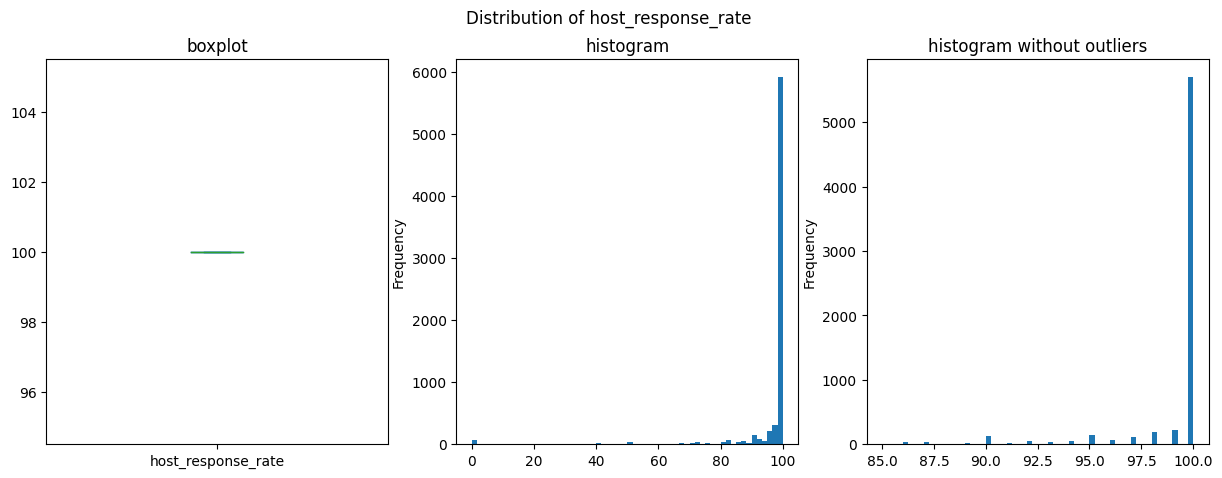

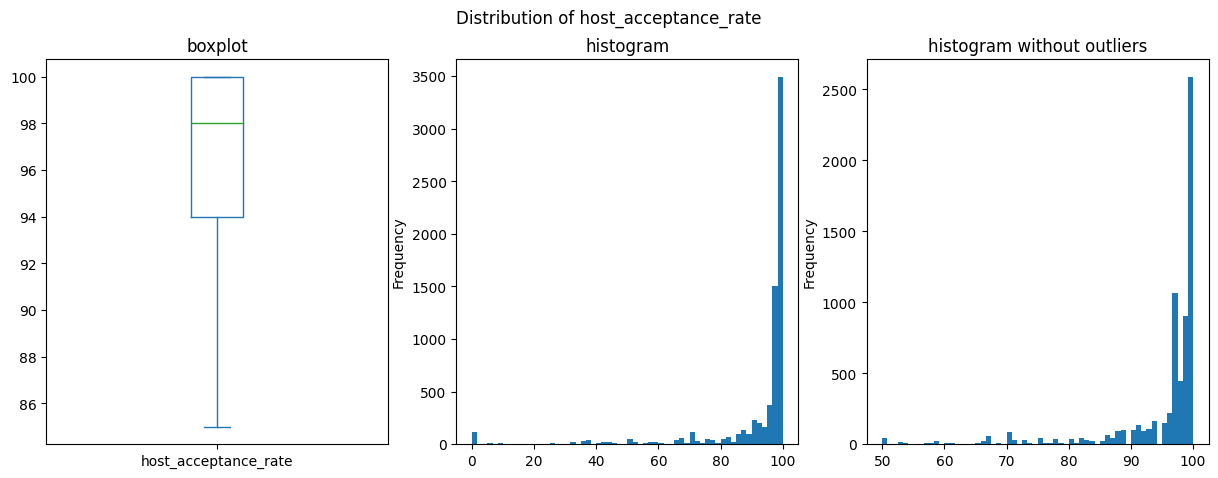

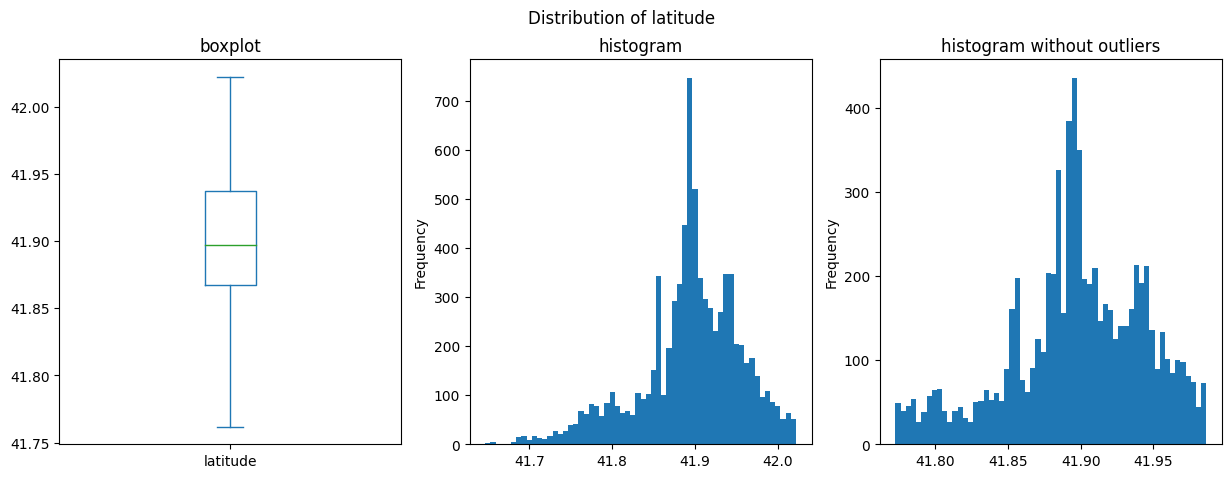

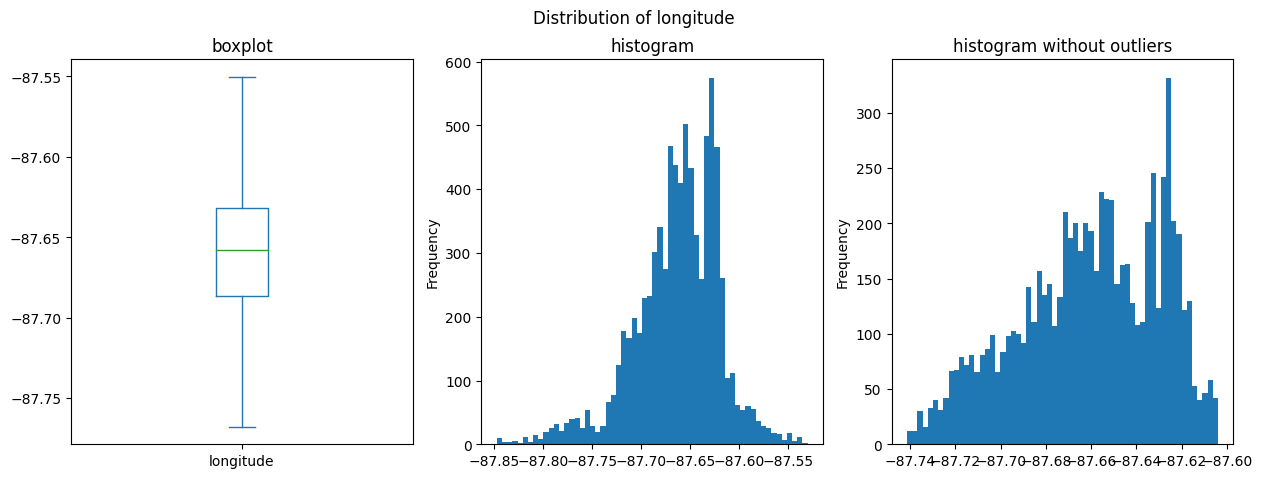

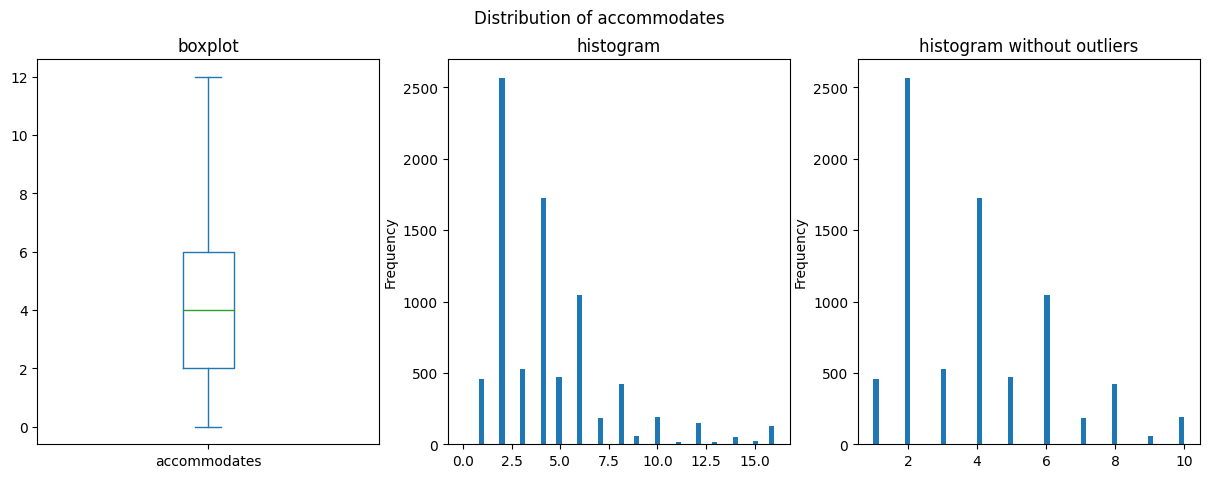

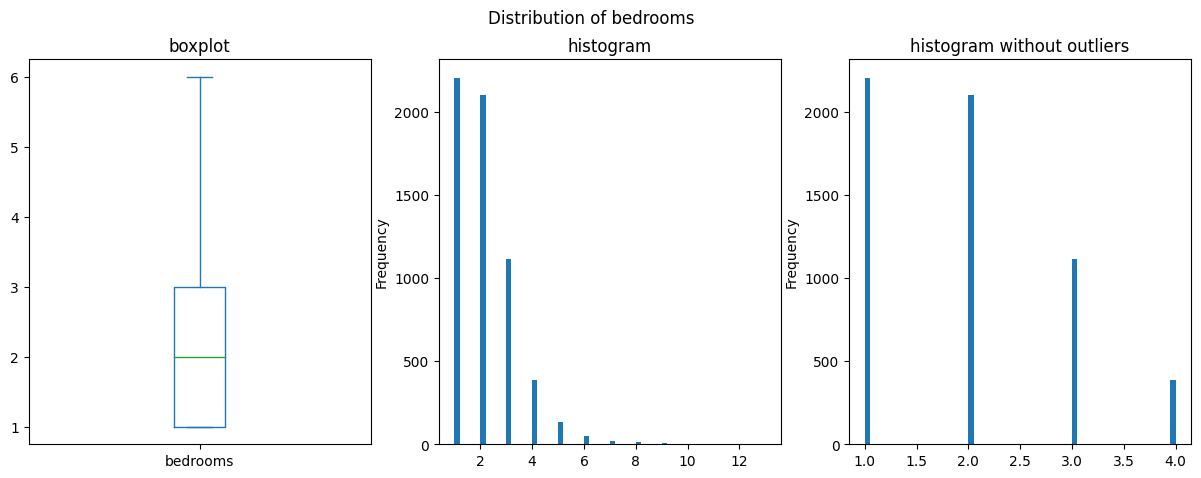

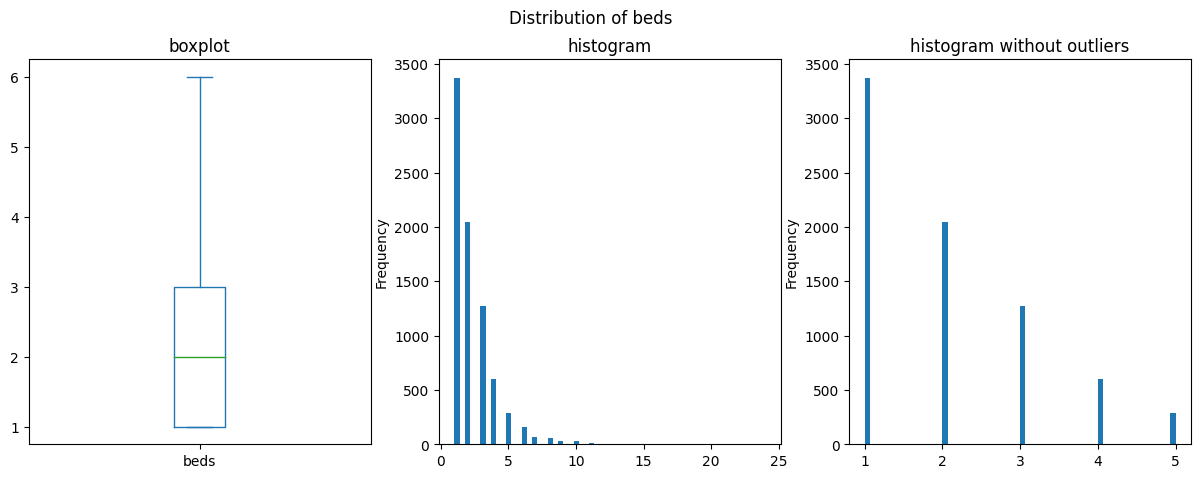

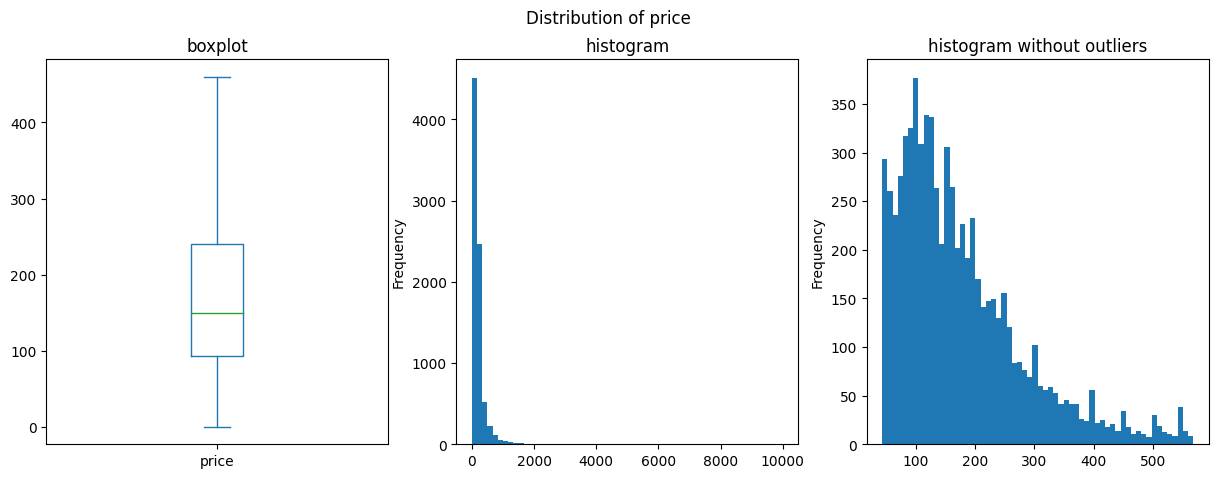

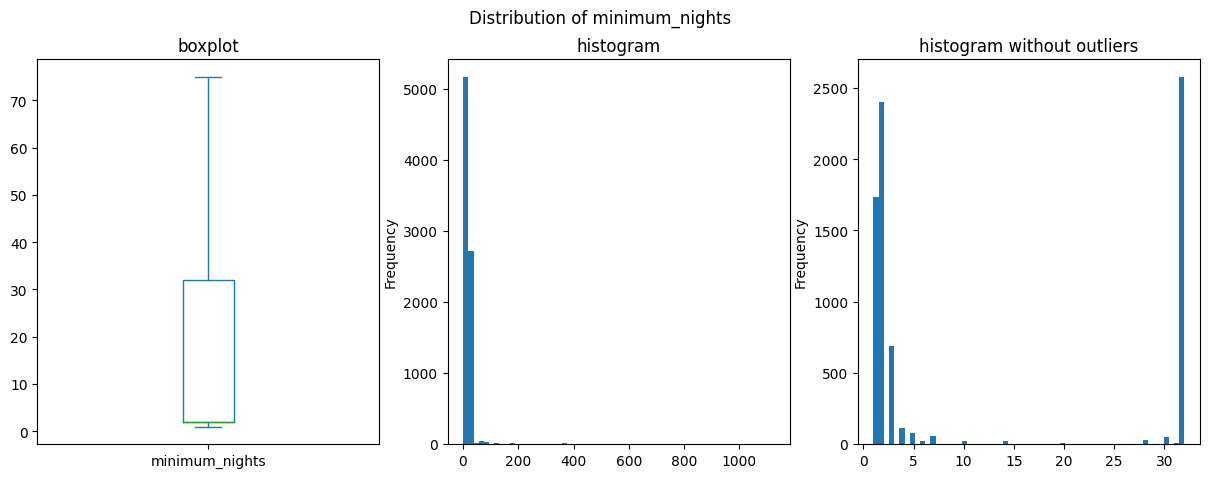

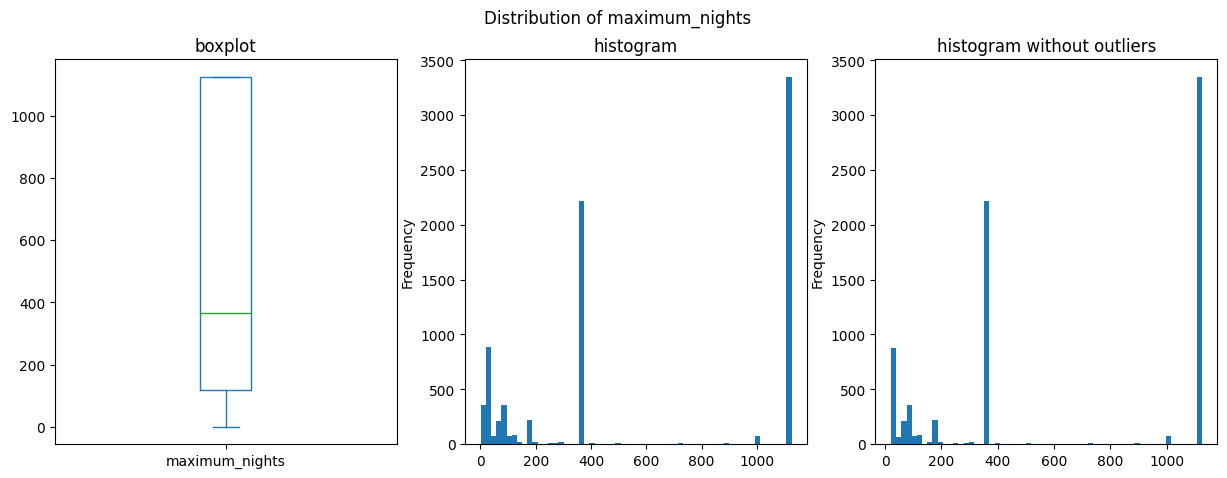

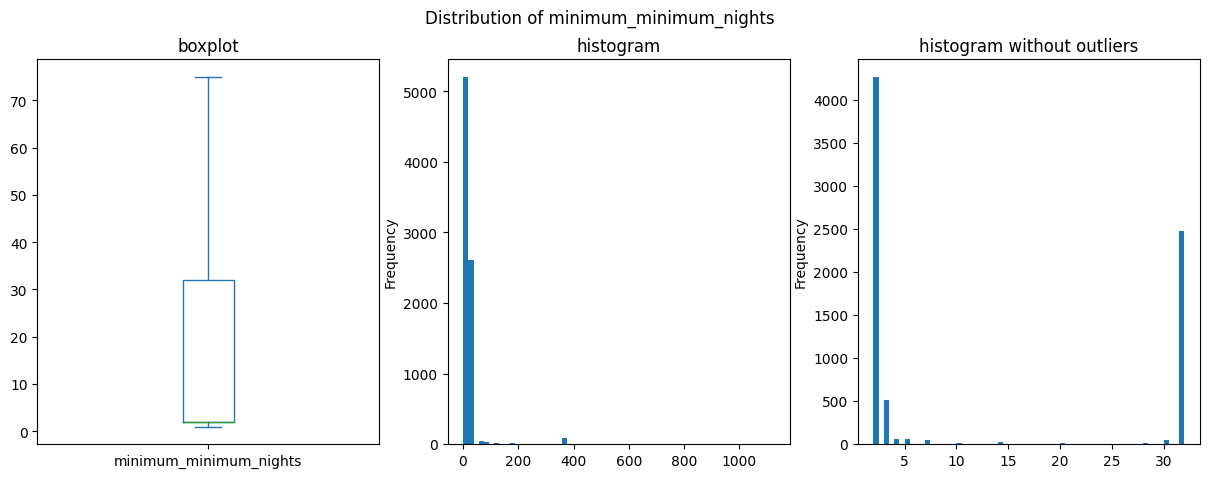

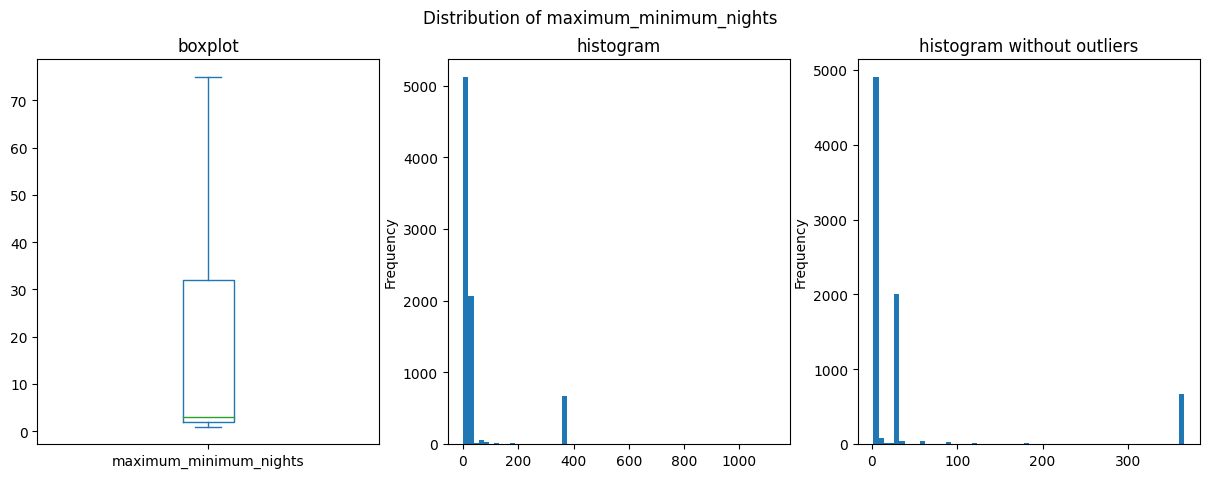

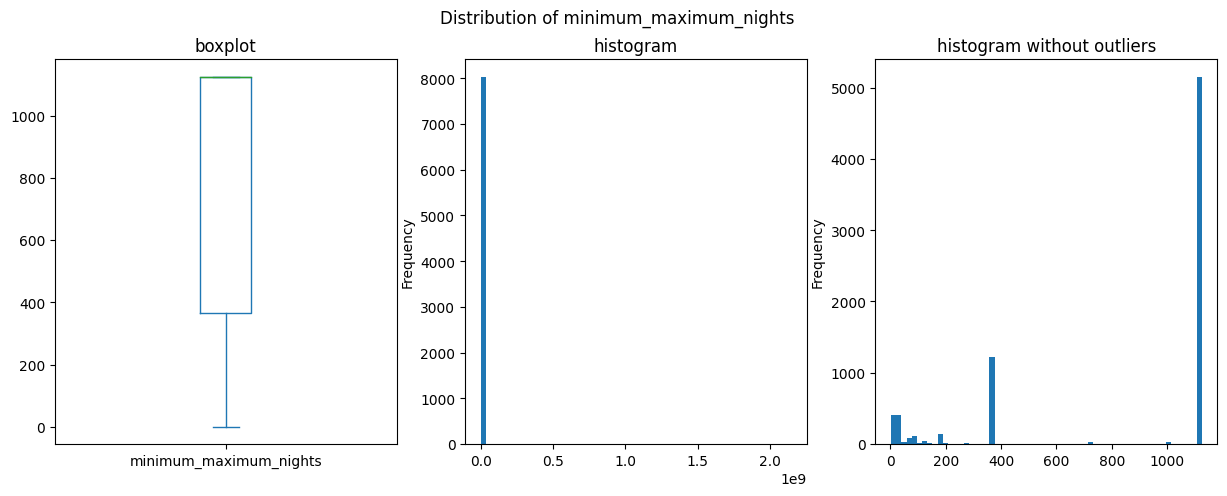

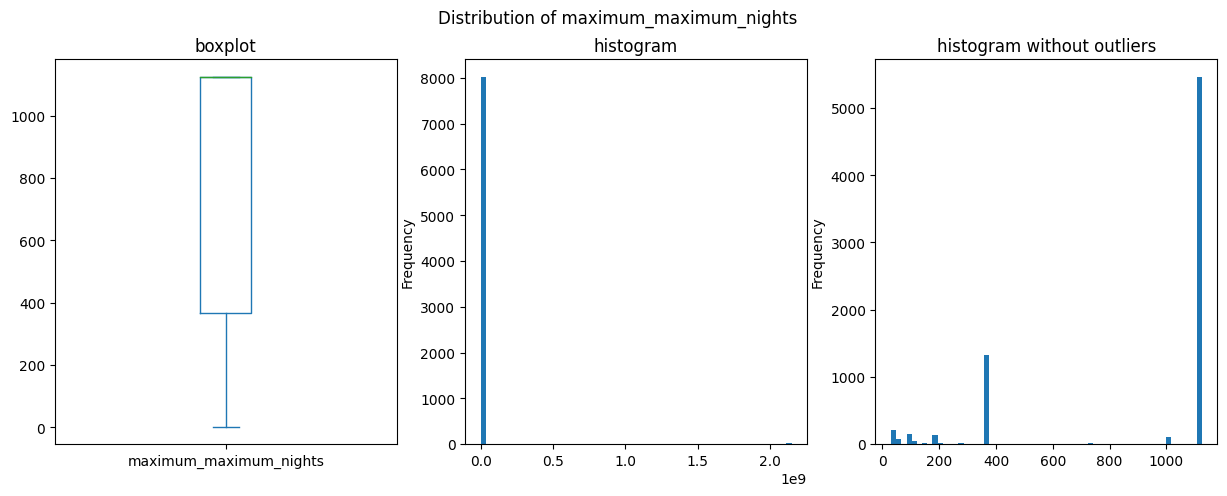

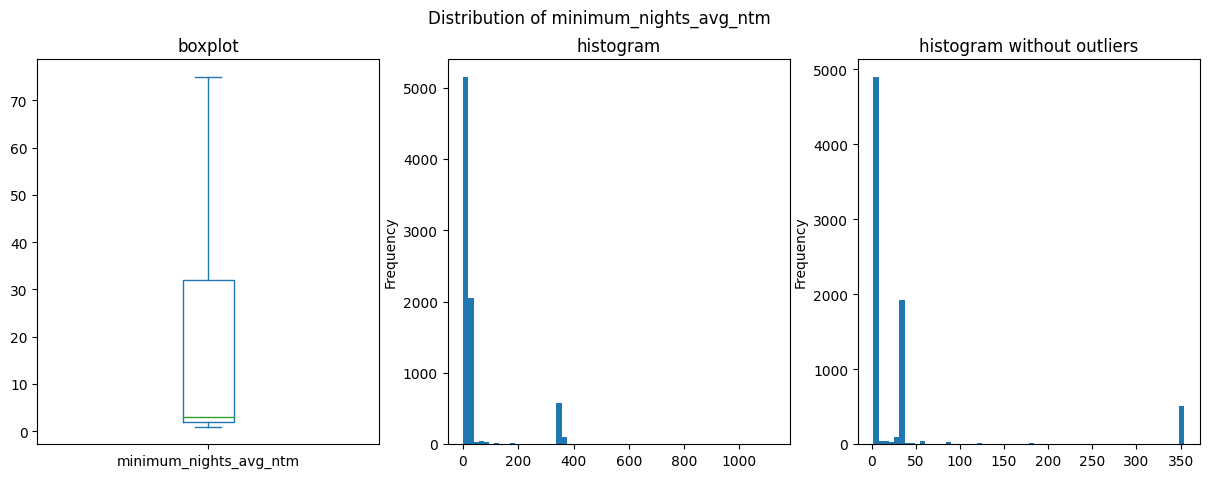

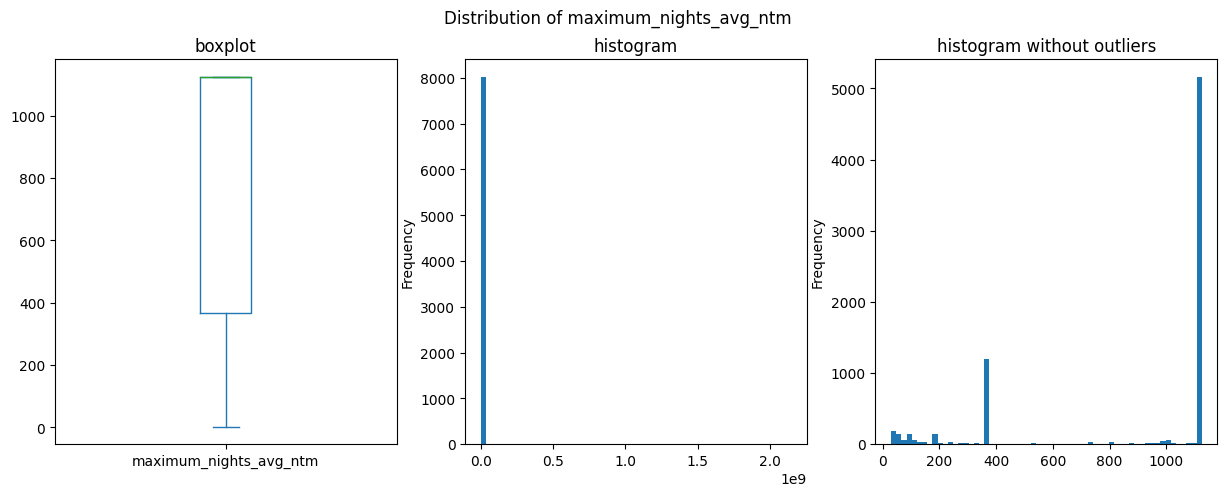

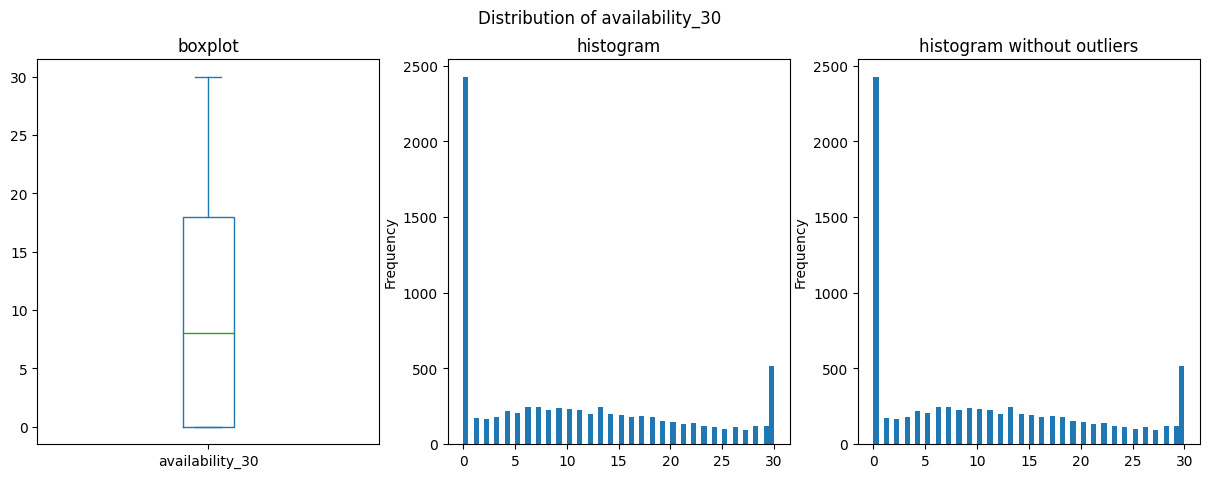

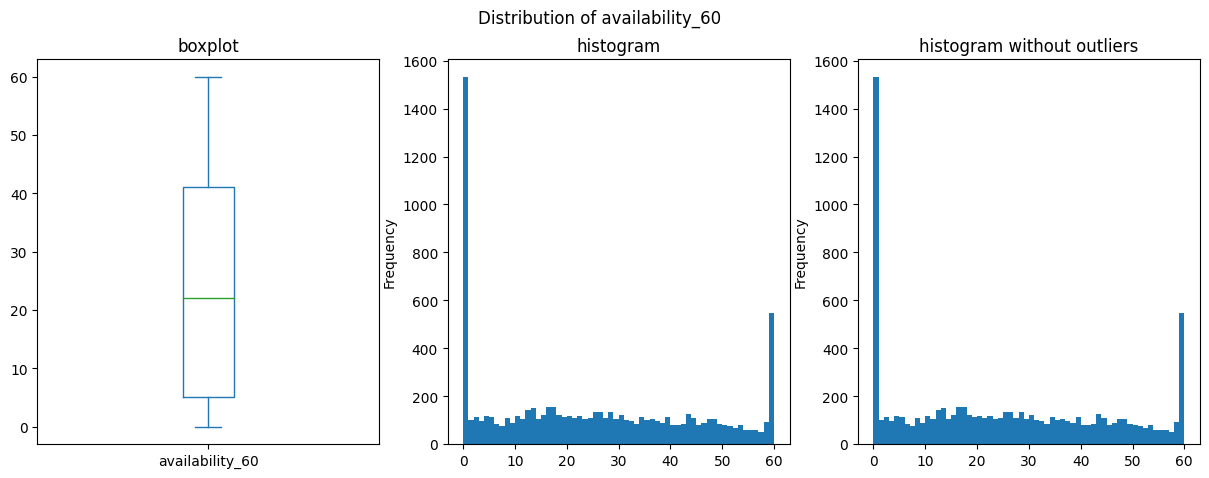

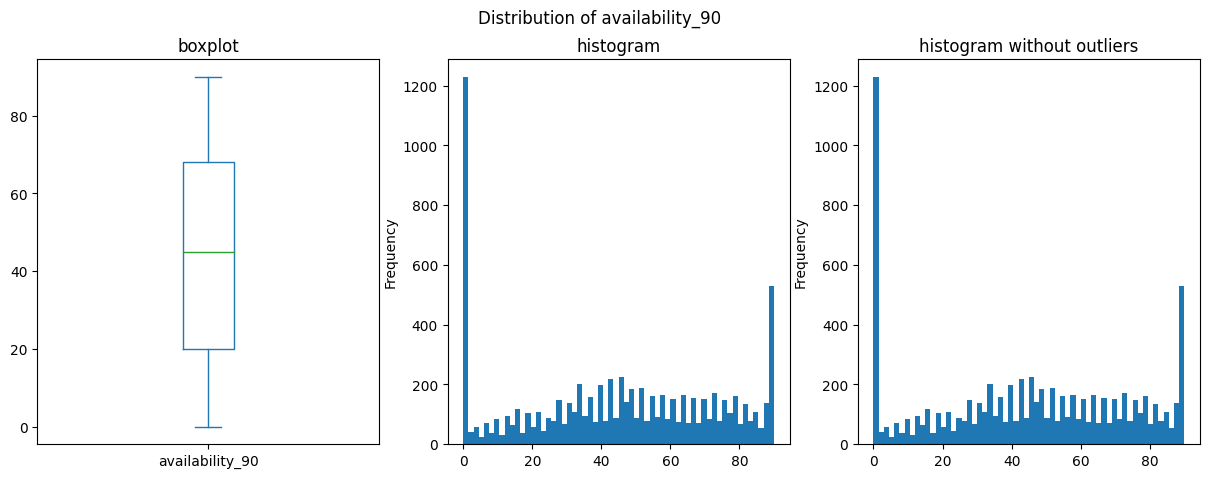

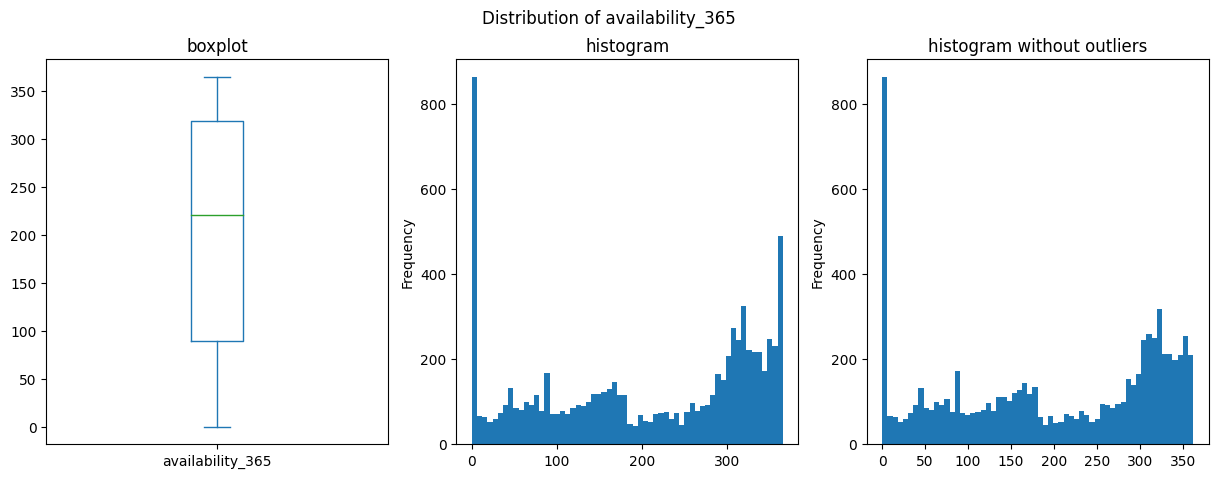

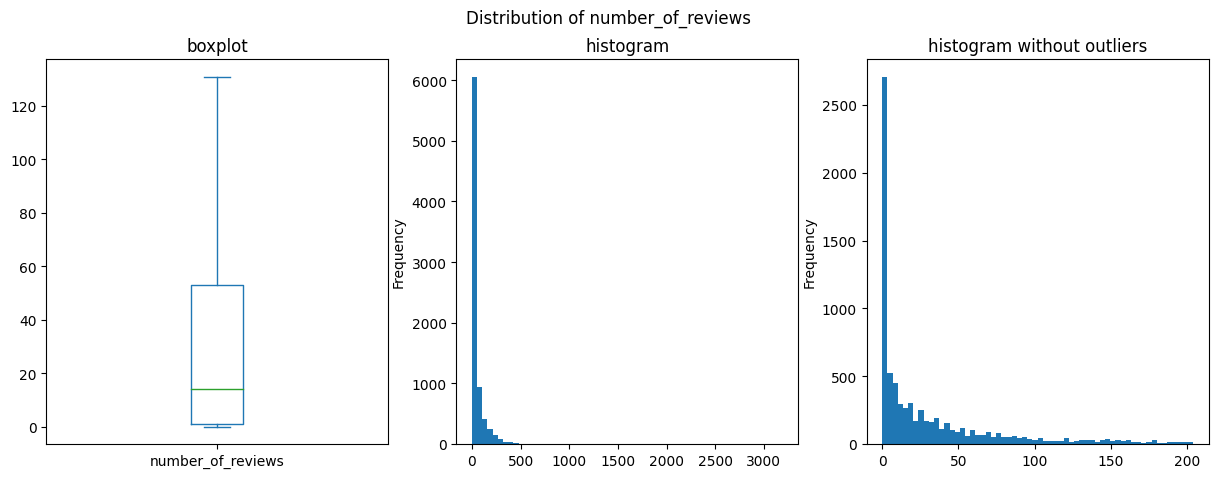

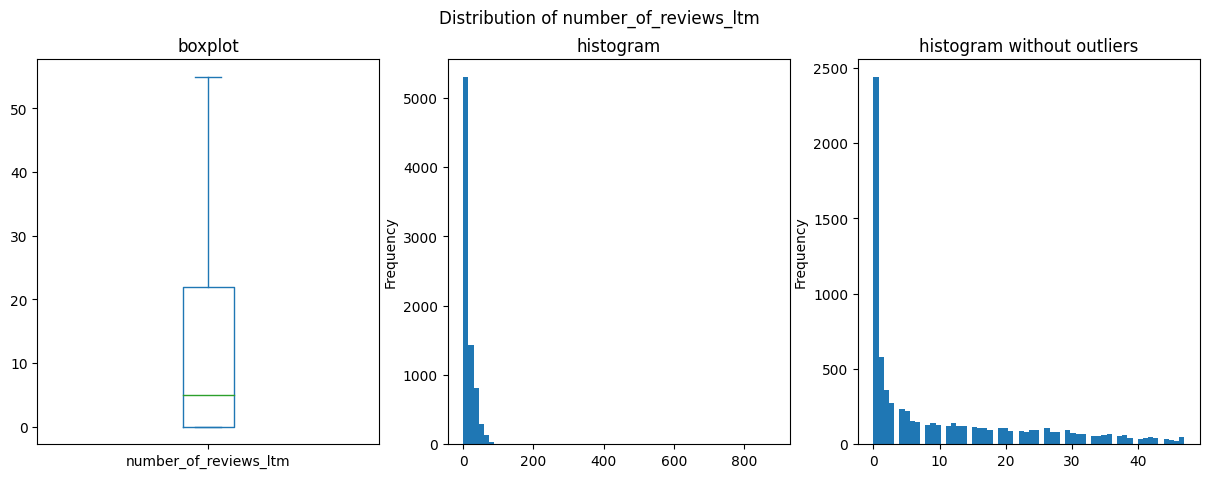

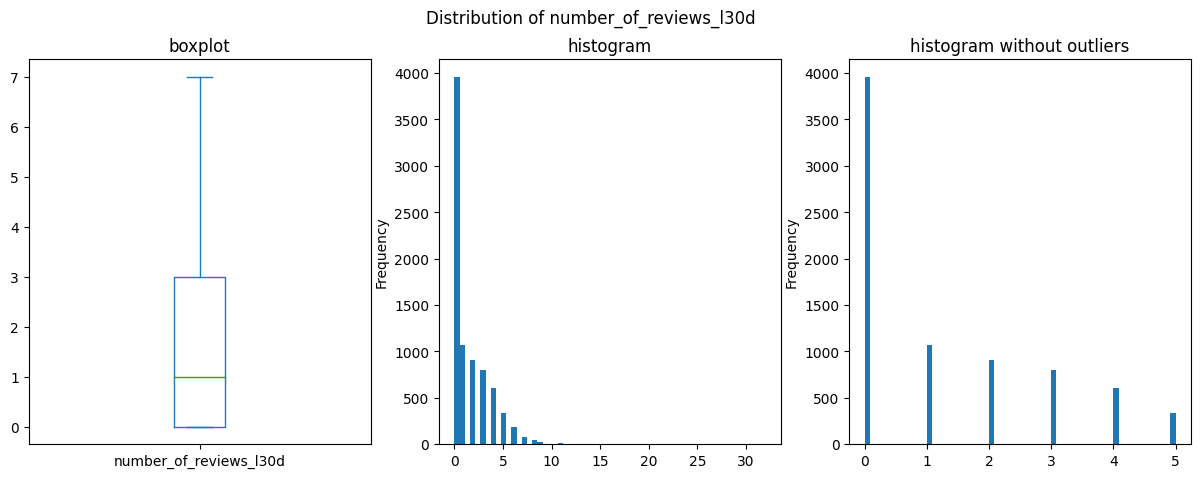

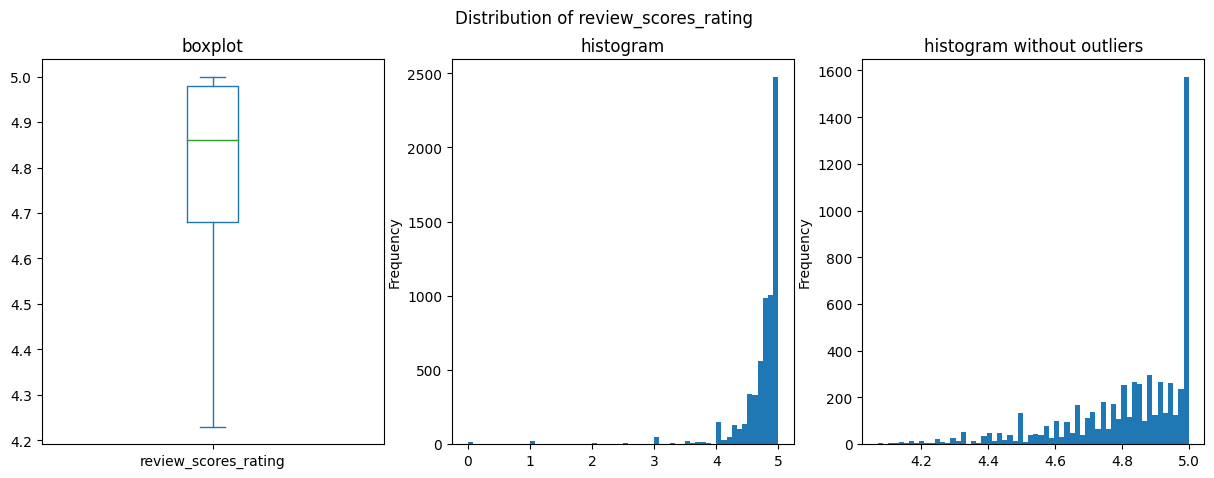

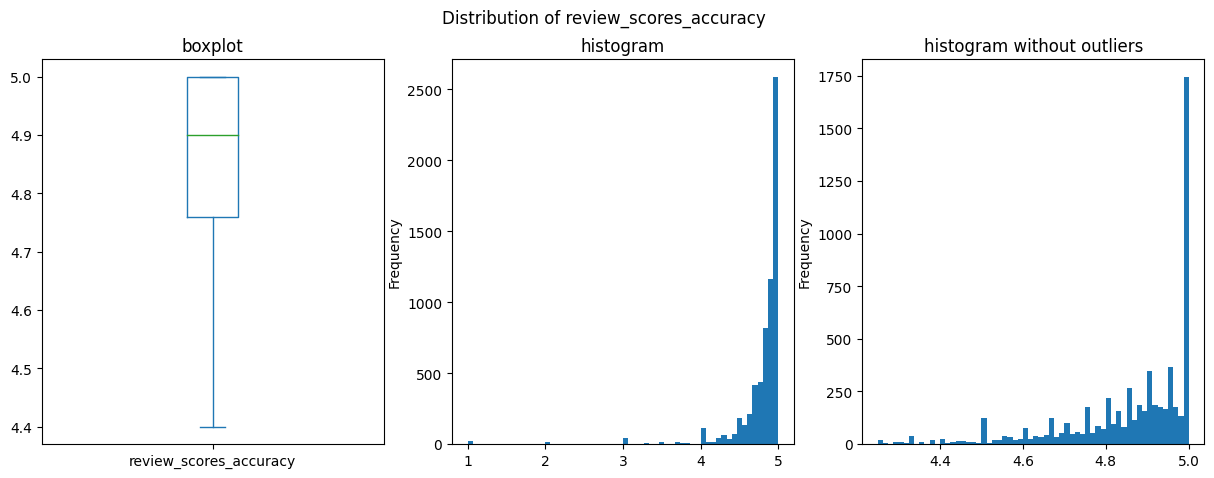

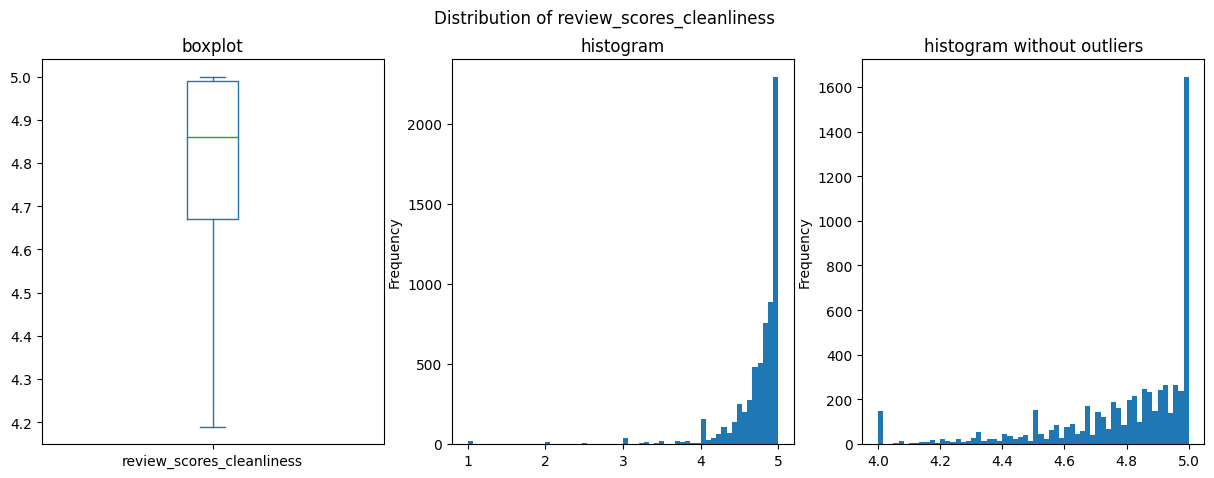

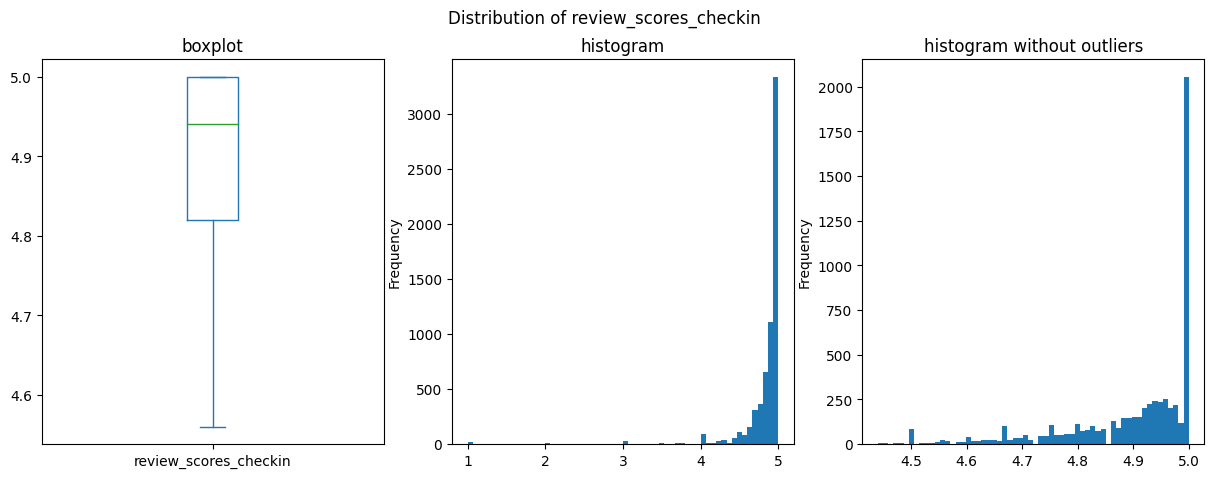

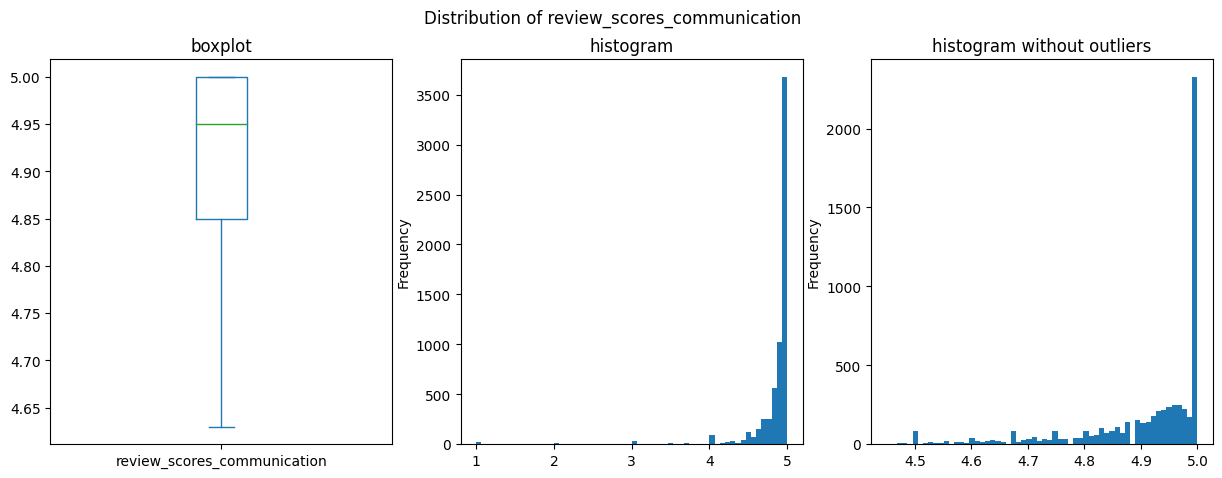

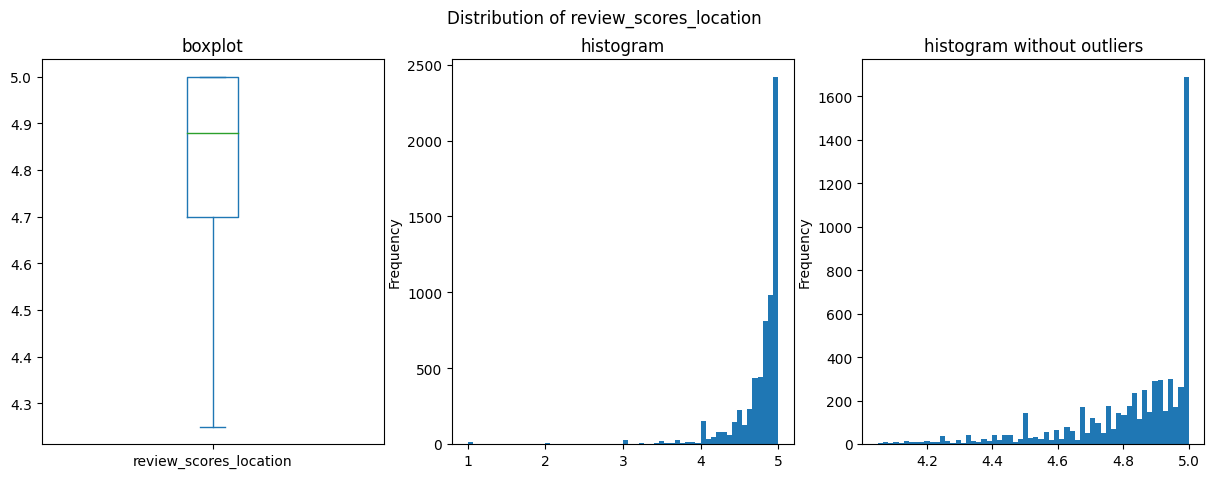

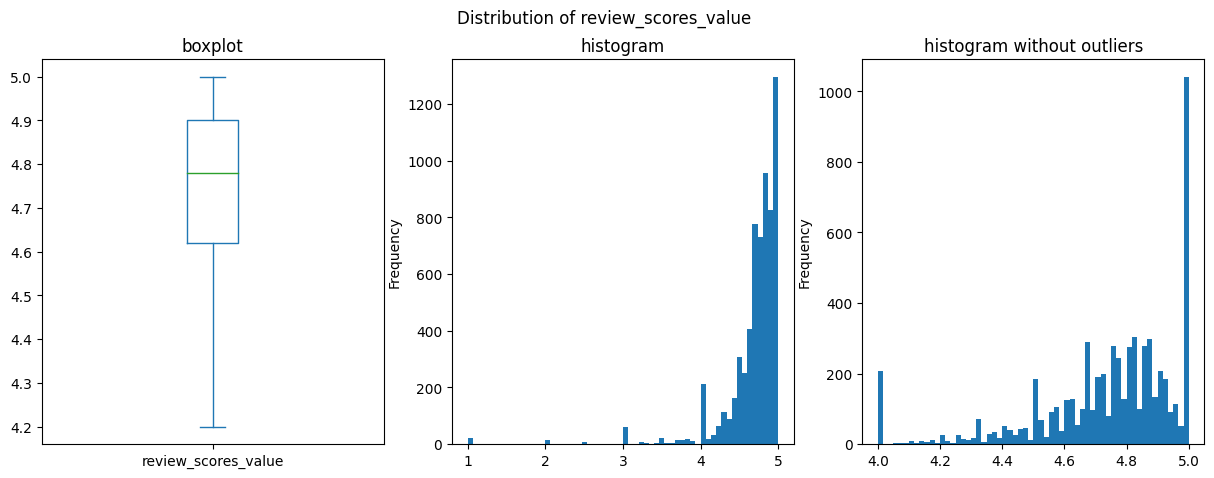

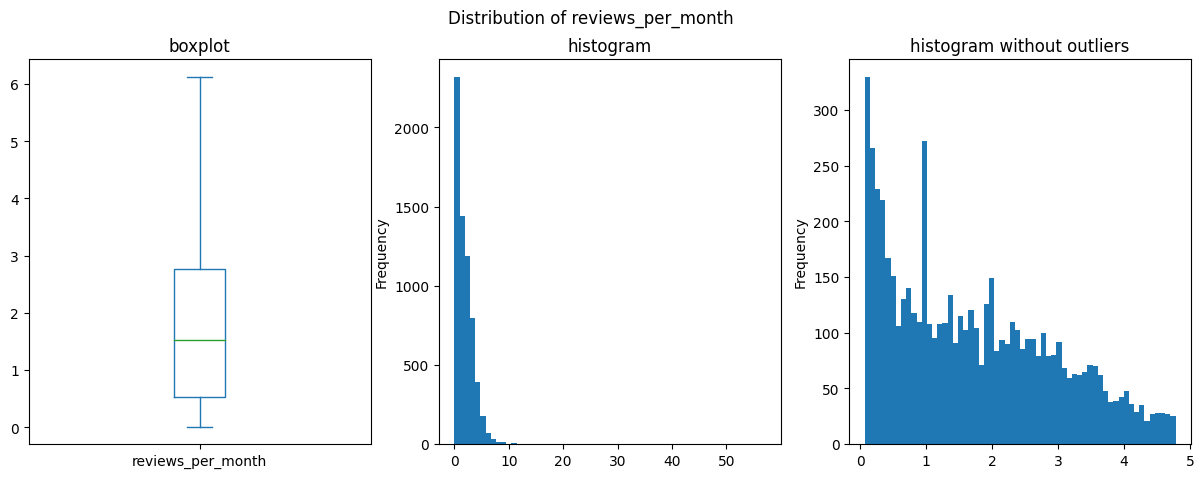

In [29]:
for col in df.select_dtypes(include=np.number):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
  fig.suptitle(f"Distribution of {col}")
  df[col].plot(kind="box", showfliers=False, ax=ax1, title="boxplot")
  df[col].plot(kind="hist", bins=60, ax=ax2, title="histogram")
  df[
      (df[col] >= df[col].quantile(0.05)) & (df[col] <= df[col].quantile(0.95))
  ][col].plot(kind="hist", bins=60, ax=ax3, title="histogram without outliers")

  plt.show()
  plt.close()

#### Columnas categóricas
El diagrama de barras se realiza sobre los valores encontrados, sin hacer interpolación de nulos y solamente para el top 30 de categorías más frecuentes.

##### host_response_time
- Más 80% de los host responden en una hora.

##### host_is_superhost
- 60% de los hosts son superhost.

##### host_identity_verified
- 80% de los host tienen identidad verificada.

##### neighbourhood_cleansed
- 6 barrios tienen más del 50% de los airbnb: Near North Side, West Town, Lake View, Near West Side, Logan Square, Loop y Lincoln Park.

##### property_type
- Más del 50% de las propiedades son rentadas como unidades completas, es decir, todo el edificio, o son rentadas como todo el apartamento.

##### room_type
- Casi el 80% de las propiedades se rentan como toda la propiedad, en vez de alguna habitación.

##### bathrooms_text
- Más del 50% de las propiedades tiene 1 o 2 baños privados.
- En Estados Unidos, se tiene que medio baño es un baño con inodoro y lavamanos, así que hay algunas unidades con valores no enteros.

##### has_availability
- Casi todas las propiedades tienen disponibilidad en alguno de los siguientes días al scraping.

##### instant_bookable
- Más del 60% de las propiedades necesitan agendamiento previo para rentar.

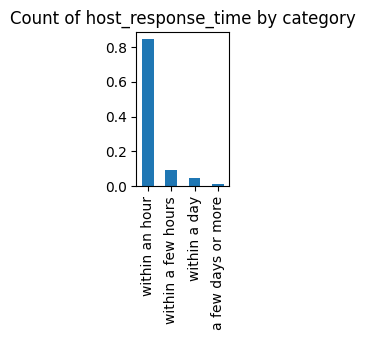

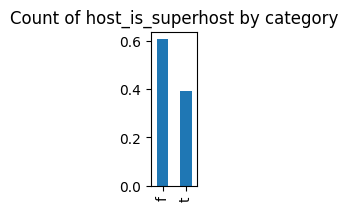

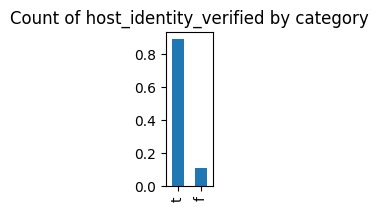

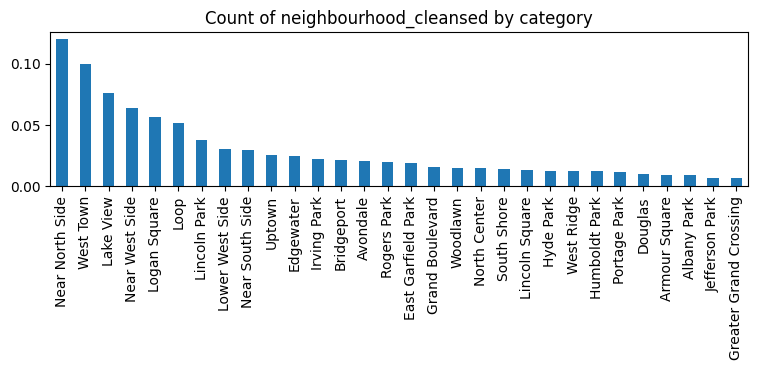

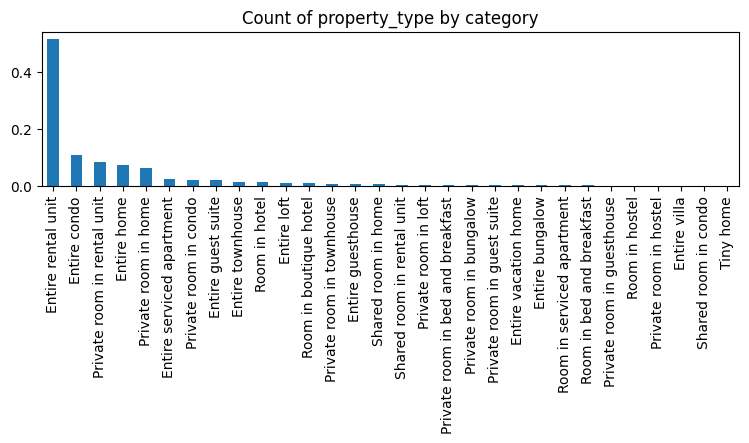

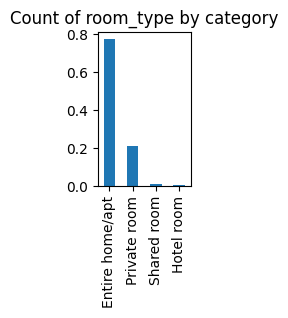

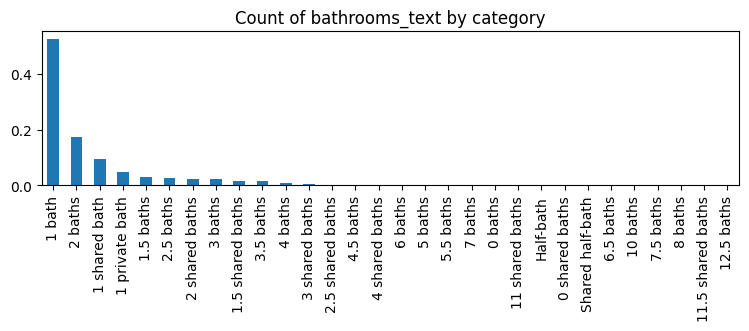

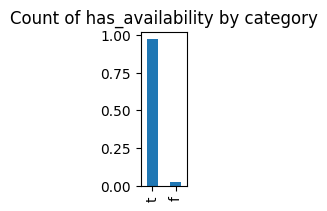

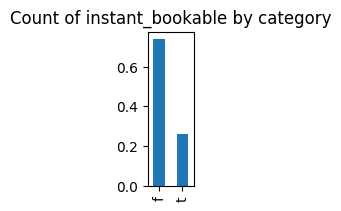

In [30]:
for col in df.select_dtypes(include="O"):
  if col not in ["id", "amenities"]:
    df_cat_counts = df[col].value_counts(normalize=True)[:30]
    df_cat_counts.plot(kind="bar", title=f"Count of {col} by category", figsize=(0.3 * len(df_cat_counts), 2))
    plt.show()
    plt.close()

### Guardado de archivo limpio de listings

In [31]:
df.to_csv(SAVING_LISTINGS_FILE, index=False)